# Project Assignment 8 - Analyze the avocado data 
## Author: Jonathan Heard
## Class: CIS256DA

Chapter 8 Asignment

Data for this assignment is in: avocado.csv

Tasks

1. Read the data from the CSV file into a DataFrame and display the first five rows (3 pts.).
2. Display basic information about the DataFrame and its columns to see that the Date column has the object type (2 pts.).
3. Convert the Date column to the datetime type (2 pts.).
4. Filter the data so it contains just the rows for 2015, for the conventional type, and for the region named Albany. 
        Store just the Date, Total Bags, and Small Bags columns in a new DataFrame (3 pts.).
5. Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column. 
        Name the column that contains the type of bag Bags, and name the column that contains the number of bags Count. 
        Then, display the resulting new DataFrame (4 pts.).
6. Plot the melted data with Seaborn in a line plot, using the hue parameter to distinguish between the bag types (2 pts.).
7. Bin the data in the Total Volume column into four quantiles labeled ‘poor’, ‘modest’, ‘good’, and ‘excellent’, 
        and store the bin labels in a new column (3 pts.).
8. Plot the binned data by year using a Seaborn count plot (2 pts.).

Questions

You must show the code that answers each question, include your answer as a comment.

1. Of the three bag sizes, which size sells the most? Hint: Melt the three bag size columns and plot the bags by year (4 pts.).
2. Which type of avocado sells the most (3 pts.)?

After completing the assignment, please submit your .ipynb file.


## Import required modules

In [1]:
# Import the modules needed for this project.

# Import pandas and assign the alias pd
import pandas as pd

# Import seaborn and assign the alias sbn
import seaborn as sbn


## Tasks

In [2]:
# Task 01 Read the data from the CSV file into a DataFrame and display the first five rows.

avocado_data = pd.read_csv("avocado.csv")

avocado_data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Task 02 Display basic information about the DataFrame and its columns to see that the Date column has the object type.

avocado_data.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 5.0 MB


In [4]:
# Task 03 Convert the Date column to the datetime type.

avocado_data.Date = avocado_data.Date.apply(pd.to_datetime)

# display the data after the conversion, to verify the change.
avocado_data.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 4.0 MB


In [5]:
# Task 04 Filter the data so it contains just the rows for 2015, for the conventional type, and for the region named Albany. 
#       Store just the Date, Total Bags, and Small Bags columns in a new DataFrame.

avocado_data_4_2015 = avocado_data.query('year == 2015 and type == "conventional" and region == "Albany"')[['Date', 'Total Bags', 'Small Bags']]

# display the new DataFrame information and verify the content.
avocado_data_4_2015.info(memory_usage = 'deep')

avocado_data_4_2015.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        52 non-null     datetime64[ns]
 1   Total Bags  52 non-null     float64       
 2   Small Bags  52 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


,Date,Total Bags,Small Bags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [6]:
# Task 05 Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column. 
#       Name the column that contains the type of bag Bags, and name the column that contains the number of bags Count. 
#       Then, display the resulting new DataFrame.

avocado_data_4_2015_melted = pd.melt(avocado_data_4_2015, id_vars = 'Date',
                                    value_vars = ['Total Bags', 'Small Bags'],
                                    var_name = 'Bags', value_name = 'count')

avocado_data_4_2015_melted

# Since ther were only 52 rows in the DataFrame before the melt, it makes sense that there would be 104 after melting 2 columns.


,Date,Bags,count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
99,2015-02-01,Small Bags,9170.82
100,2015-01-25,Small Bags,10103.35
101,2015-01-18,Small Bags,11651.09
102,2015-01-11,Small Bags,8036.04


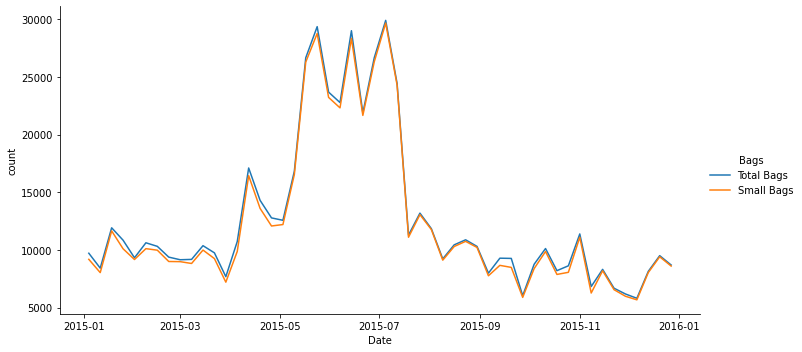

In [7]:
# Task 06 Plot the melted data with Seaborn in a line plot, using the hue parameter to distinguish between the bag types.

sbn.relplot(data = avocado_data_4_2015_melted, kind = 'line', 
            height = 5, aspect = 2.0, x = 'Date', y = 'count', hue = 'Bags');


In [8]:
# Task 07 Bin the data in the Total Volume column into four quantiles labeled ‘poor’, ‘modest’, ‘good’, and ‘excellent’, 
#       and store the bin labels in a new column.

label_list = ['poor', 'modest', 'good', 'excelent']

avocado_data.rename(columns = {'Total Volume':'TotalVolume'}, inplace = True)

avocado_data['Total_Volume_bins'] = pd.qcut(avocado_data.TotalVolume, q = 4,
                                           labels = label_list)

avocado_data.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total_Volume_bins
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,modest


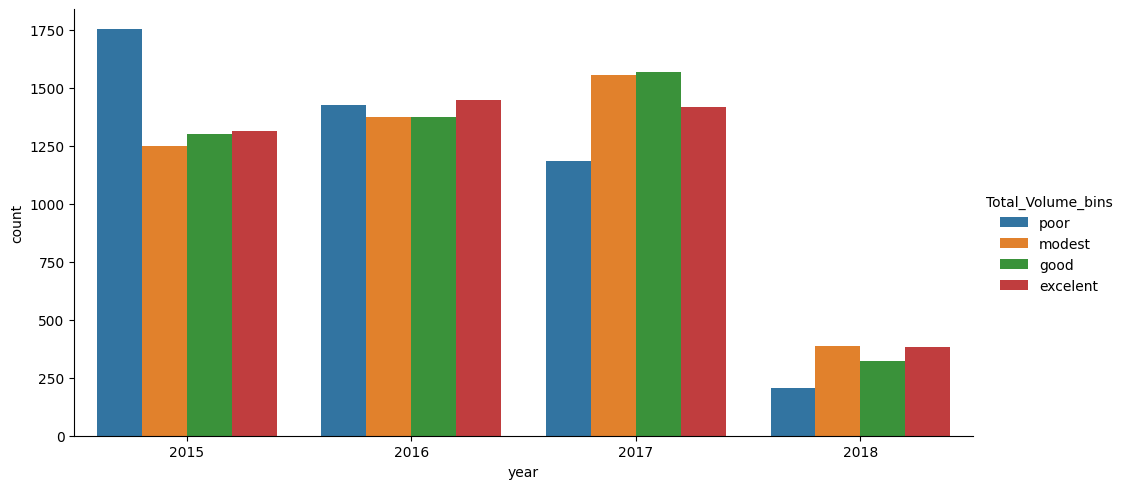

In [9]:
# Task 08 Plot the binned data by year using a Seaborn count plot.

sbn.catplot(data = avocado_data, kind  = 'count', x = 'year', hue = 'Total_Volume_bins', aspect = 2);

## Questions

In [10]:
# Question 01: Of the three bag sizes, which size sells the most? 
#              Hint: Melt the three bag size columns and plot the bags by year.

avocado_data_bags_melted = pd.melt(avocado_data, id_vars = 'year',
                                    value_vars = ['Small Bags', 'Large Bags', 'XLarge Bags'],
                                    var_name = 'Bags', value_name = 'count')
                                   
# sbn.catplot(data = avocado_data_bags_melted, kind  = 'count', x = 'year', hue = 'Bags', aspect = 2); 
#   Couldn't get this to work, all the count columns were the same height.

avocado_data_bags_melted

,year,Bags,count
0,2015,Small Bags,8603.62
1,2015,Small Bags,9408.07
2,2015,Small Bags,8042.21
3,2015,Small Bags,5677.40
4,2015,Small Bags,5986.26
...,...,...,...
54742,2018,XLarge Bags,0.00
54743,2018,XLarge Bags,0.00
54744,2018,XLarge Bags,0.00
54745,2018,XLarge Bags,0.00


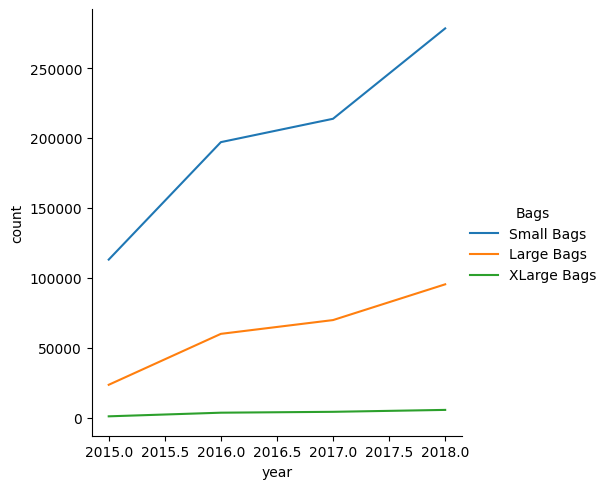

In [11]:
# Question 01-a: Of the three bag sizes, which size sells the most? 
#              Hint: Melt the three bag size columns and plot the bags by year.

# Switched to using a line plot and found my answer. 

sbn.relplot(data = avocado_data_bags_melted, kind  = 'line', x = 'year', y = 'count' , hue = 'Bags', ci = None);  

# The answer is the "Small Bags" far exceeds the other 2 sizes. That is, unless I missed something completely.


In [12]:
# Question 02: Which type of avocado sells the most?

avocado_data_types = avocado_data[['type', 'Total Bags']]


avocado_data_types.groupby('type').sum()

# Based on this output, the "conventional" avocado type sells the most.


,Total Bags
type,
conventional,4.146764e+09
organic,2.264115e+08
